# Task2

#### Step 1: Import the needed libraries and data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import os

data = pd.read_excel('analysis_task_data.xlsx', index_col=0, parse_dates=True)
data.head()

,time,Wind Day Ahead Forecast [in MW],Wind Intraday Forecast [in MW],PV Day Ahead Forecast [in MW],PV Intraday Forecast [in MW],Day Ahead Price hourly [in EUR/MWh],Intraday Price Price Quarter Hourly [in EUR/MWh],Intraday Price Hourly [in EUR/MWh],Imbalance Price Quarter Hourly [in EUR/MWh]
hour,,,,,,,,,
0,2021-01-01 00:00:00,4433,4709,0,0,50.87,44.409894,48.682294,13.33
0,2021-01-01 00:15:00,4286,4507,0,0,50.87,52.139142,48.682294,-0.92
0,2021-01-01 00:30:00,4142,4307,0,0,50.87,50.160255,48.682294,60.26
0,2021-01-01 00:45:00,3991,4181,0,0,50.87,41.342082,48.682294,-12.05
1,2021-01-01 01:00:00,3847,4094,0,0,48.19,64.424013,46.165819,96.09


In [16]:
# Get the column names for better acessability in the future
# I didn't rename the column names by choice, to allow for better
# readability of the code
data.columns.values

array(['time', 'Wind Day Ahead Forecast [in MW]',
       'Wind Intraday Forecast [in MW]', 'PV Day Ahead Forecast [in MW]',
       'PV Intraday Forecast [in MW]',
       'Day Ahead Price hourly [in EUR/MWh]',
       'Intraday Price Price Quarter Hourly  [in EUR/MWh]',
       'Intraday Price Hourly  [in EUR/MWh]',
       'Imbalance Price Quarter Hourly  [in EUR/MWh]'], dtype=object)

### Task 2.1
##### How much Wind/PV Power was forecasted to produced in German in 2021 [in MWh] on Day Ahead (da) and on Intraday (id).

In [17]:
# Define the year of interest for this analysis
year_of_interest = 2021
# Transform the time column to datetime format for better handling
data['time'] = pd.to_datetime(data['time'])
df_year = data[data['time'].dt.year == year_of_interest]

# Since 15min intervals given in MW, we need to define a scalar
h_per_interval = 15/60

# Sum up every column scaled with the 15min interval
total_wind_da_mwh = (df_year['Wind Day Ahead Forecast [in MW]'] * h_per_interval).sum()
total_wind_id_mwh = (df_year['Wind Intraday Forecast [in MW]'] * h_per_interval).sum()
total_pv_da_mwh = (df_year['PV Day Ahead Forecast [in MW]'] * h_per_interval).sum()
total_pv_id_mwh = (df_year['PV Intraday Forecast [in MW]'] * h_per_interval).sum()


# Print the results in Million for better readability
results = {
    'Wind DA (MWh) in Million': total_wind_da_mwh / 1e06,
    'Wind ID (MWh) in Million': total_wind_id_mwh / 1e06,
    'PV DA (MWh) in Million': total_pv_da_mwh / 1e06,
    'PV ID (MWh) in Million': total_pv_id_mwh / 1e06,
}

results

{'Wind DA (MWh) in Million': np.float64(115.39540625),
 'Wind ID (MWh) in Million': np.float64(113.4780345),
 'PV DA (MWh) in Million': np.float64(46.09457275),
 'PV ID (MWh) in Million': np.float64(46.6898915)}

##### Online Research yields that these results seem to make sense and are of the right magnitude

### Task 2.2
#### Show the average Wind/Solar production for 2021 over a 24h period for Intraday and Day Ahead (4 lines in one graph).

In [18]:
# Set the time column as an index for better handling of the 
df_year.set_index('time', inplace = True)

# Group the data by days and calculate the mean 
average_df = df_year[['Wind Day Ahead Forecast [in MW]', 'Wind Intraday Forecast [in MW]', 
                      'PV Day Ahead Forecast [in MW]', 'PV Intraday Forecast [in MW]']].resample('D').mean()

# Scale by 1/4 since we have still hourly data 
average_df *= h_per_interval

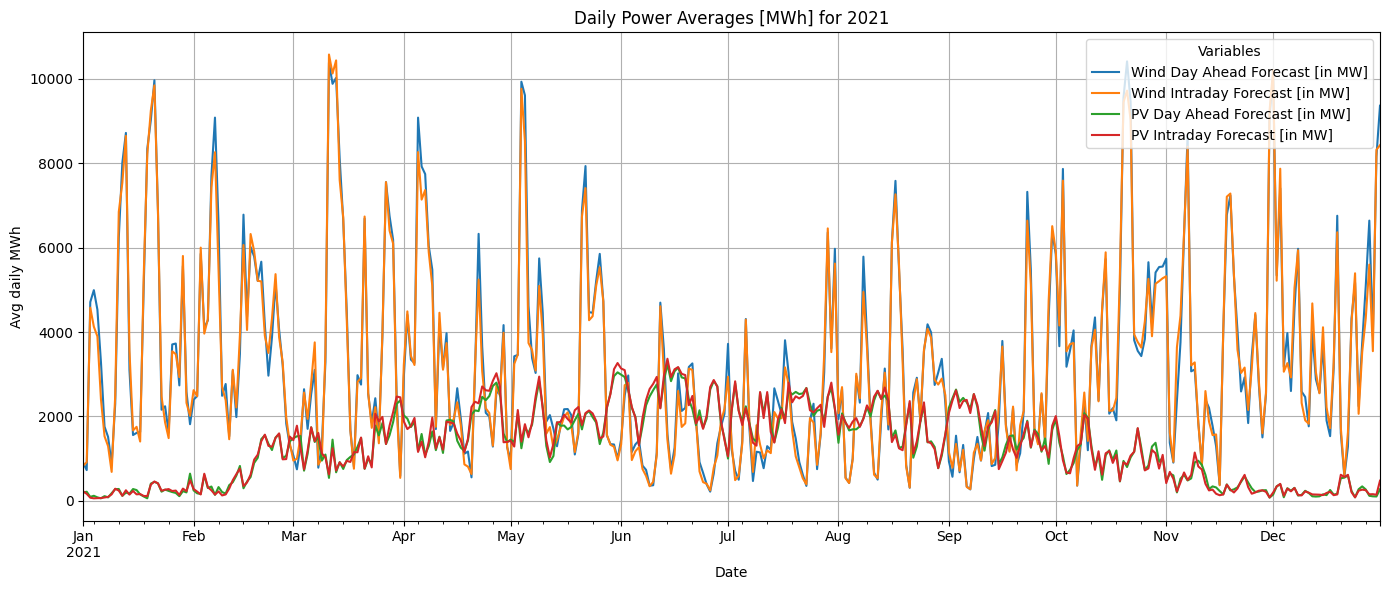

In [19]:
## Plotting
plt.figure(figsize=(14, 6))
average_df.plot(ax=plt.gca())
plt.title('Daily Power Averages [MWh] for 2021')
plt.xlabel('Date')
plt.ylabel('Avg. daily MWh')
plt.legend(title='Variables', loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

### Task 2.3
#### What was the average value [in EUR/MWh] for Wind/Solar Power in 2021 using the da forecast and  using da h prices? The average value is defined as the average hourly value that a Wind/PV farm owner would have received for their product. Is the average value of Wind and PV higher or lower than the average da price? Why could it be higher/lower?

In [20]:
# Get the scaled columns of interest and the price for the day ahead market
wind_mwh = df_year['Wind Day Ahead Forecast [in MW]'] * 0.25
pv_mwh = df_year['PV Day Ahead Forecast [in MW]'] * 0.25
price = df_year['Day Ahead Price hourly [in EUR/MWh]']

# calculate the total revenue for both wind an pv
wind_revenue = wind_mwh * price
pv_revenue = pv_mwh * price

# get the avg. price by dividing the total revenue of each soruce 
# by the total amount of energy produced
avg_value_dh_wind = wind_revenue.sum() / wind_mwh.sum()
avg_value_dh_pv = pv_revenue.sum() / pv_mwh.sum()

print(f'The value for wind is {avg_value_dh_wind}[€/MWh]')
print(f'The value for pv is {avg_value_dh_pv}[€/MWh]')

The value for wind is 81.38706977035753[€/MWh]
The value for pv is 76.89453079034125[€/MWh]


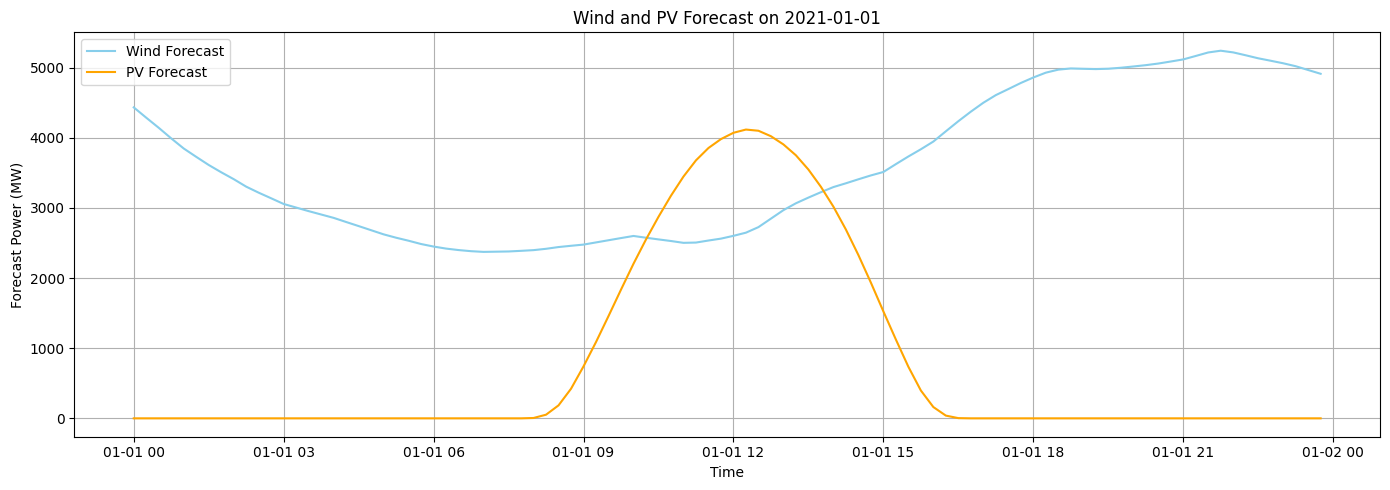

In [65]:
# This result makes perfect sense since pv/solar produces only during daylight, this can be beautifully seen
# in the following chart
# This plot makes since especially in the winter time where there is only daylight for a very small time window
# Define the date
day = 1
month = 1
year = 2021

date_mask = (df_year.index.date == pd.Timestamp(year, month, day).date())

# look at our predefined day
df_day = df_year[date_mask]
plt.figure(figsize=(14, 5))

plt.plot(df_day.index, df_day['Wind Day Ahead Forecast [in MW]'], label='Wind Forecast', color='skyblue')
plt.plot(df_day.index, df_day['PV Day Ahead Forecast [in MW]'], label='PV Forecast', color='orange')

plt.title(f'Wind and PV DA Forecast on {year}-{month:02d}-{day:02d}')
plt.xlabel('Time')
plt.ylabel('Forecast (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2.4
##### Find the Day with the highest renewable energy production and with the lowest renewable energy production in 2021. What was the average Day Ahead Price levels on these days? How do you explain the difference in prices?

In [22]:
# Group by day again and sum it up, scaling by 1/4 since values are in MWh but provided quarter hourly to get MWh
df_ = df_year[['Wind Day Ahead Forecast [in MW]', 'PV Day Ahead Forecast [in MW]']].resample('D').sum()*(1/4)

# Create a new renewable column
df_['Renewable Day Ahead Forecast'] = df_['Wind Day Ahead Forecast [in MW]'] + df_['PV Day Ahead Forecast [in MW]']

# Get the index with the highest and get the index with the lowest production of renewables, i.e. max and min
highest_day = df_['Renewable Day Ahead Forecast'].idxmax()
lowest_day = df_['Renewable Day Ahead Forecast'].idxmin()

print(f'the highest day was {highest_day}')
print(f'the lowest day was {lowest_day}')

the highest day was 2021-03-12 00:00:00
the lowest day was 2021-11-16 00:00:00


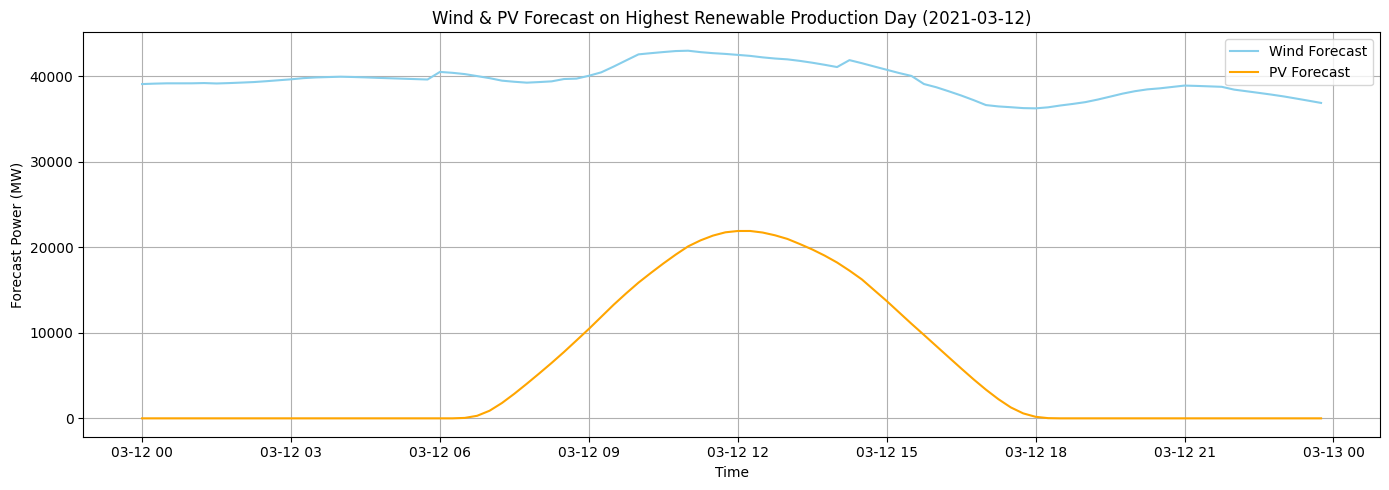

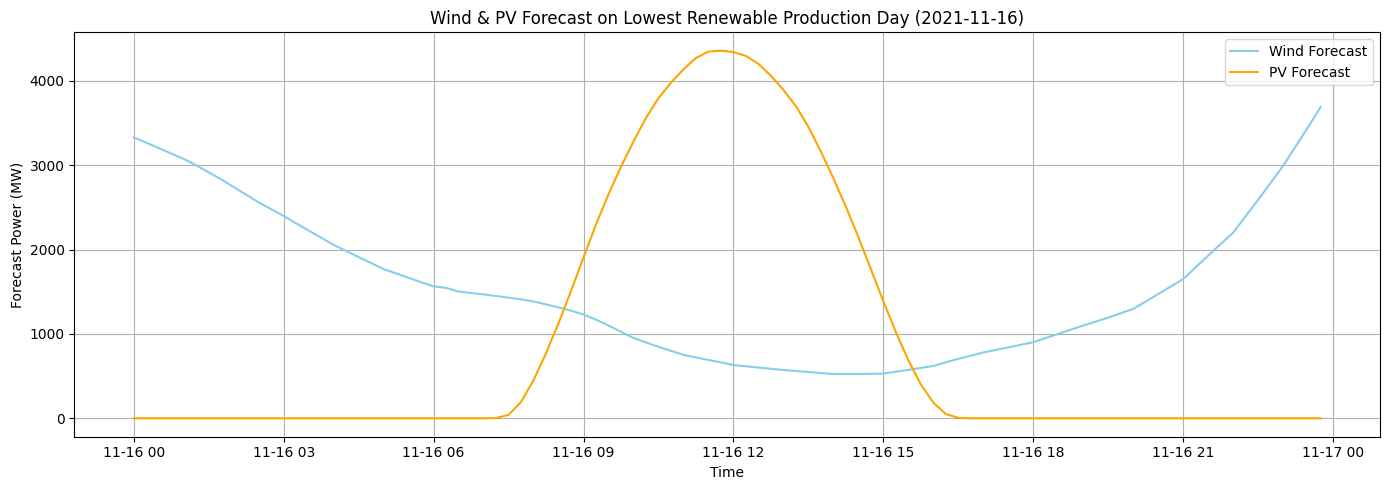

In [23]:
## Plotting the days for visualization
# Plot for the highest production day
date_mask_highest = (df_year.index.date == highest_day.date())
df_day_highest = df_year[date_mask_highest]

plt.figure(figsize=(14, 5))
plt.plot(df_day_highest.index, df_day_highest['Wind Day Ahead Forecast [in MW]'], label='Wind Forecast', color='skyblue')
plt.plot(df_day_highest.index, df_day_highest['PV Day Ahead Forecast [in MW]'], label='PV Forecast', color='orange')

plt.title(f'Wind & PV DA Forecast on Highest Renewable Production Day ({highest_day.date()})')
plt.xlabel('Time')
plt.ylabel('Forecast (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#  Plot for the lowest production day
date_mask_lowest = (df_year.index.date == lowest_day.date())
df_day_lowest = df_year[date_mask_lowest]

plt.figure(figsize=(14, 5))
plt.plot(df_day_lowest.index, df_day_lowest['Wind Day Ahead Forecast [in MW]'], label='Wind Forecast', color='skyblue')
plt.plot(df_day_lowest.index, df_day_lowest['PV Day Ahead Forecast [in MW]'], label='PV Forecast', color='orange')

plt.title(f'Wind & PV DA Forecast on Lowest Renewable Production Day ({lowest_day.date()})')
plt.xlabel('Time')
plt.ylabel('Forecast (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### We can clearly see that on the lowest production day, the power generated by wind was very low, compared to the highest production day where the wind was constantly high. On the lowest day thedistribution of the PV is tighter, more energy was produced in a smaller timeframe compared to the highest day

In [26]:
## the avg price ahead 
price_highest_day = df_year.loc[highest_day.strftime('%Y-%m-%d')]['Day Ahead Price hourly [in EUR/MWh]']
price_lowest_day = df_year.loc[lowest_day.strftime('%Y-%m-%d')]['Day Ahead Price hourly [in EUR/MWh]']

# Calculate the average price for both days
avg_price_highest = price_highest_day.mean()
avg_price_lowest = price_lowest_day.mean()

print(f'Average Day Ahead Price on the highest day {highest_day.strftime("%Y-%m-%d")}: {avg_price_highest:.2f} EUR/MWh')
print(f'Average Day Ahead Price on the lowest day {lowest_day.strftime("%Y-%m-%d")}: {avg_price_lowest:.2f} EUR/MWh')


Average Day Ahead Price on the highest day 2021-03-12: 22.29 EUR/MWh
Average Day Ahead Price on the lowest day 2021-11-16: 237.47 EUR/MWh


#### Hypothesis: On the highest day of renwable production there will be an oversupply esp. around Midday, which will cause likely cause negative

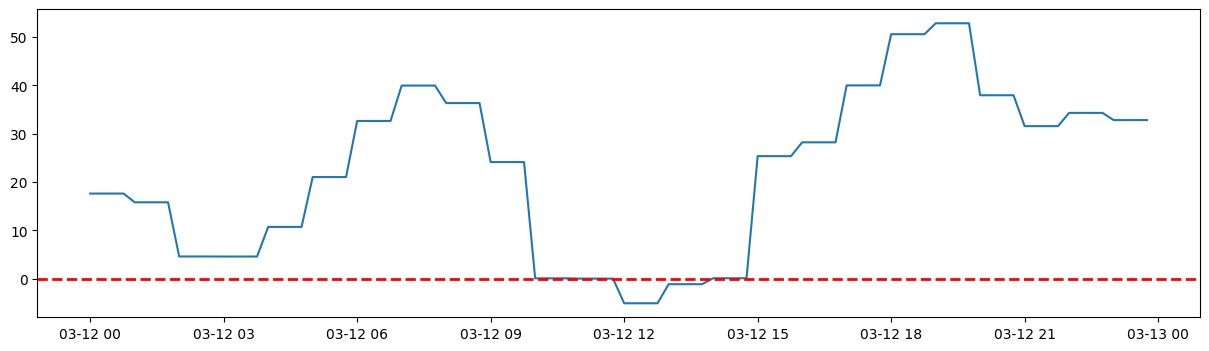

In [27]:
## Investigating: hypothesis negative prices on highest day impact the avg price
plt.figure(figsize=(15,4))
plt.plot(price_highest_day.index, price_highest_day)
plt.axhline(0, color='red', linestyle='--', linewidth=2)

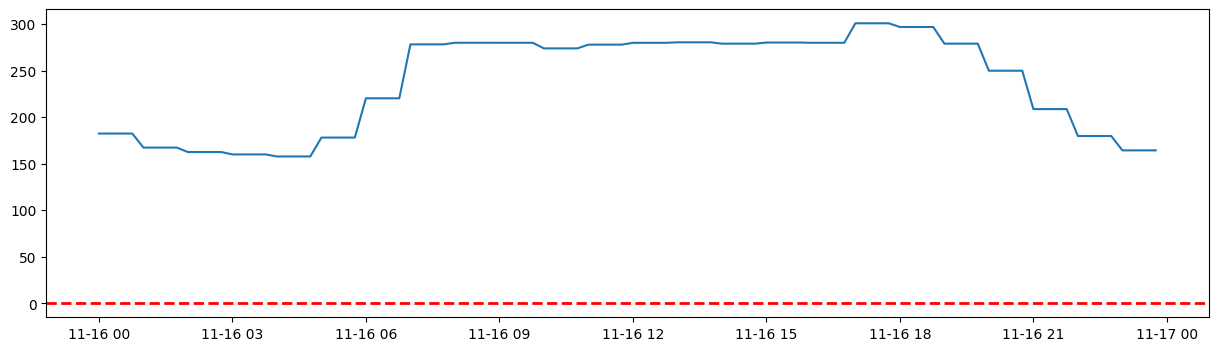

In [28]:
plt.figure(figsize=(15,4))
plt.plot(price_lowest_day.index, price_lowest_day)
plt.axhline(0, color='red', linestyle='--', linewidth=2)

### Explaination:
##### On the day with highest production there was too much electricity produced (i.e. oversupply), especially during midday, where sun/pv and wind were both at peak resulting in negativ prices and thus lowering the avg. price.
##### In contrast on the lowest day, additional power has probably been needed and thus the higher cost of electricity on the market.


### Task 2.5:
##### What is the average hourly da price during week days vs during weekends. Why do you think average prices may differ?

In [29]:
# Get the weekdays and weekends utilising datetime
weekdays_df_year = df_year[df_year.index.weekday < 5]
weekend_df_year = df_year[df_year.index.weekday >= 5]

# filter the weekdays and weekends and calculate the respective mean
avg_hourly_weekday_da_price = weekdays_df_year['Day Ahead Price hourly [in EUR/MWh]'].mean()
avg_hourly_weekend_da_price = weekend_df_year['Day Ahead Price hourly [in EUR/MWh]'].mean()

print(f'the avg hourly day ahead price on weekdays is {avg_hourly_weekday_da_price} €/MWh')
print(f'the avg hourly day ahead price on weekends is {avg_hourly_weekend_da_price} €/MWh')

## Makes intuitive sense, higher power demand by industries and thus grid imbalance during the week
## less demand on weekends


the avg hourly day ahead price on weekdays is 104.36723180076628 €/MWh
the avg hourly day ahead price on weekends is 77.98435096153847 €/MWh


### Task 2.6
#### How much revenue would you generate with a battery with a capacity of 1 MWh which you can fully charge and fully discharge (1 Cycle) every day in 2021? Think about when you would charge and when you would discharge and apply this rule for each day of the year.


### Disclaimer:
#### There can be two approaches to solve this question. I want to approach both, since it is not clear from the task whether we can use the perfect hindisght bias or not


### Approach 1: 
#### NO hindsight, thus more like a trading strategy, utilising the lower quantils to buy/load and high quantiles to sell/discharge. The disadvantage of this approach is, that we might buy to early or sell to late leading to non optimal decision making. The advantage is that it is more realistic.

### Approach 2: 
#### Perfect hindisght, utilizing the whole dataset, we can calculate how much theoretical profit we could have made if we charged and discharged everyday at the min and max of prices. This yields a very good comparison for our strategy of how high theoretical profits could be.

#### One has to consider that approach 1 is basic and could be approached more sophisticated, but for this purpose it serves as a very good comparison to see how good we do compared to the perfect hindsight bias.

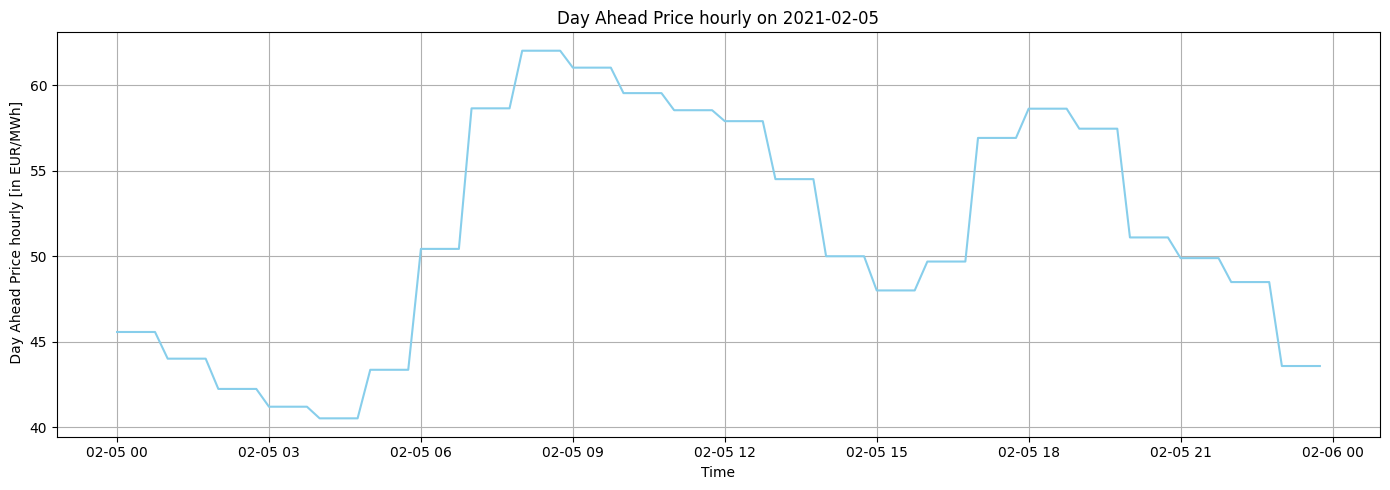

In [66]:
## Charging and discharging a battery

# Exploring Price Behaviour, when is it cheap to charge up the battery and when is it expensive
# I tried different days/month to get a feeling, especially considering the change in weather during spring and summer
# compared to winter and autumn months
day = 5
month = 2
year = 2021

date_mask = (df_year.index.date == pd.Timestamp(year, month, day).date())

df_day = df_year[date_mask]
plt.figure(figsize=(14, 5))

plt.plot(df_day.index, df_day['Day Ahead Price hourly [in EUR/MWh]'], color='skyblue')
plt.title(f'Day Ahead Price hourly on {year}-{month:02d}-{day:02d}')
plt.xlabel('Time')
plt.ylabel(' Day Ahead Price hourly [in EUR/MWh]')
plt.grid(True)
plt.tight_layout()
plt.show()


In [72]:
# groupby hourly data and create a month and hour column
df_hourly = df_year.resample('h').mean().copy()
df_hourly['month'] = df_hourly.index.month
df_hourly['hour'] = df_hourly.index.hour

# Group by month and hour
price_distributions = df_hourly.groupby(['month', 'hour'])['Day Ahead Price hourly [in EUR/MWh]']

# Calculate the quantiles for each hour of each month
quantile_df = price_distributions.quantile([0.01, 0.5, 0.99]).unstack(level=2)
quantile_df.columns = ['q10', 'q50', 'q90']

# In reality these quantiles would be probably calculated based on historic data and more sophisticated model
# In this setting the core idea gets clear
quantile_df

q10     q50      q90
month hour                         
1     0     12.058   44.90   57.306
      1     14.490   43.00   54.672
      2      9.582   42.88   52.013
      3      4.083   42.04   51.090
      4      4.886   40.39   49.867
...            ...     ...      ...
12    19    45.840  234.35  499.084
      20    21.486  225.12  456.613
      21    21.185  199.00  397.729
      22    25.620  196.13  348.039
      23    21.119  165.92  301.309

[288 rows x 3 columns]

In [33]:
q10_ = quantile_df['q10'].unstack()
q90_ = quantile_df['q90'].unstack()

# Identify hours
charging_hours = q10_.idxmin(axis=1) # lowest q10 hours (cheapest)
discharging_hours = q90_.idxmax(axis=1) # highest q90 hours (most expensive)

# List to store the daily revenue
revenues = []

# get the buy and sell price of our charging and discharging hours
for date, group in df_hourly.groupby(df_hourly.index.date):
    month = pd.Timestamp(date).month
    ch_hour = charging_hours.loc[month]
    dis_hour = discharging_hours.loc[month]
    buy_price = group[group.index.hour == ch_hour]['Day Ahead Price hourly [in EUR/MWh]'].values[0]
    sell_price = group[group.index.hour == dis_hour]['Day Ahead Price hourly [in EUR/MWh]'].values[0]
    daily_revenue = sell_price - buy_price
    revenues.append(daily_revenue)

# Sum over all the daily revenues to get the yearly
total_revenue = sum(revenues)
print(f'Total estimated battery revenue in 2021 using quantile-based rule: {total_revenue:.2f} EUR')


Total estimated battery revenue in 2021 using quantile-based rule: 22817.27 EUR


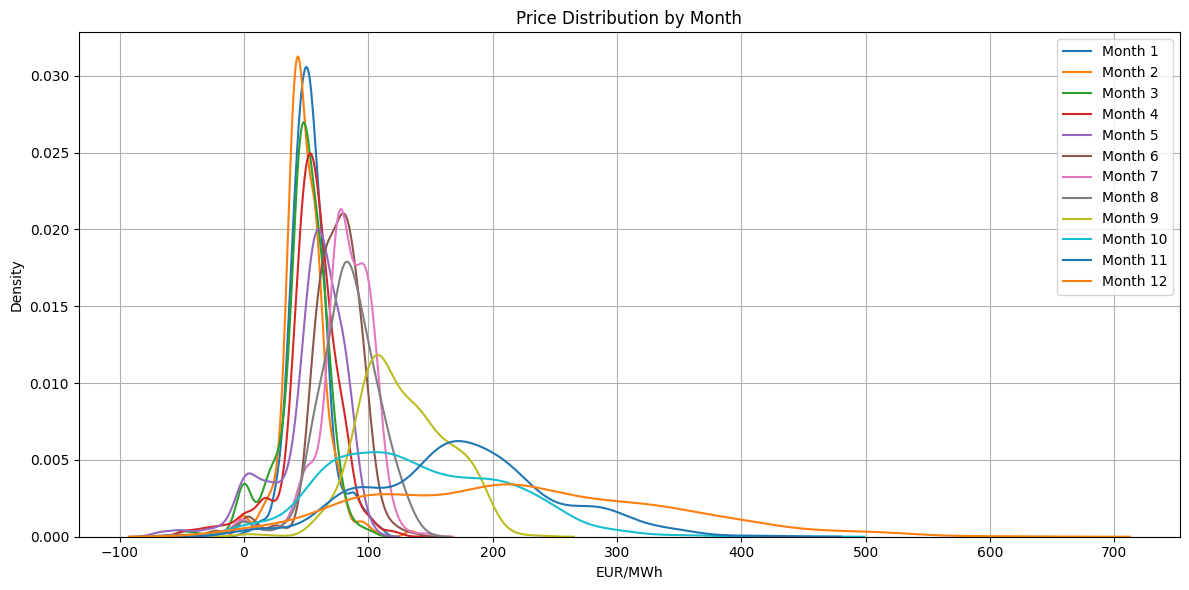

In [34]:
import seaborn as sns

# Visualise the Price distributions by month
months_to_plot = [1,2,3,4,5,6,7,8,9,10,11,12]

plt.figure(figsize=(12, 6))
for month in months_to_plot:
    monthly_prices = df_hourly[df_hourly['month'] == month]
    sns.kdeplot(monthly_prices['Day Ahead Price hourly [in EUR/MWh]'], label=f'Month {month}')
plt.title('Price Distribution by Month')
plt.xlabel('EUR/MWh')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
# Now the 'perfect' approach where we take the min and the max
df_hourly = df_year.resample('h').mean() 

# Group by day
daily_groups = df_hourly.groupby(df_hourly.index.date)

# List to store the daily revenues
revenues = []

for date, group in daily_groups:
    prices = group['Day Ahead Price hourly [in EUR/MWh]']
    min_price = prices.min()  # Charging price
    max_price = prices.max()  # Discharging price

    daily_revenue = max_price - min_price
    revenues.append(daily_revenue)

# Total annual revenue
total_revenue = sum(revenues)
print(f'Total revenue in 2021 from 1 MWh battery: {total_revenue:.2f} EUR')

## The difference of roughly 7thousand euros seems reasonable without perfect foresight 

Total revenue in 2021 from 1 MWh battery: 29311.60 EUR


### Task 2.7
#### Come up with a trading strategy that makes money between the day ahead hourly prices and the intraday hourly prices. A strategy could be something like, always buy hour 19-20 on day ahead and sell it on intraday. You can look at certain times, weekdays, seasons, production levels of wind and solar. Your strategy can have a few input paramters such as time, renewable production etc, and then a decision output between two prices. I.e. when do you want to go long and short. Show the cumulative performance of this strategy with a 100 MW position. Show your results and quickly explain your reasoning of why you think this strategymight be a good idea and why it does or does not work.



/var/folders/5z/3qs0ghfx2r9bjc7lqyt7n3dw0000gn/T/ipykernel_29583/3969978601.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['PV FC Error'] = -(df_day['PV Day Ahead Forecast [in MW]'] - df_day['PV Intraday Forecast [in MW]'])
/var/folders/5z/3qs0ghfx2r9bjc7lqyt7n3dw0000gn/T/ipykernel_29583/3969978601.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['Wind FC Error'] = -(df_day['Wind Day Ahead Forecast [in MW]'] - df_day['Wind Intraday Forecast [in MW]'])
/var/folders/5z/3qs0ghfx2r9bjc7l

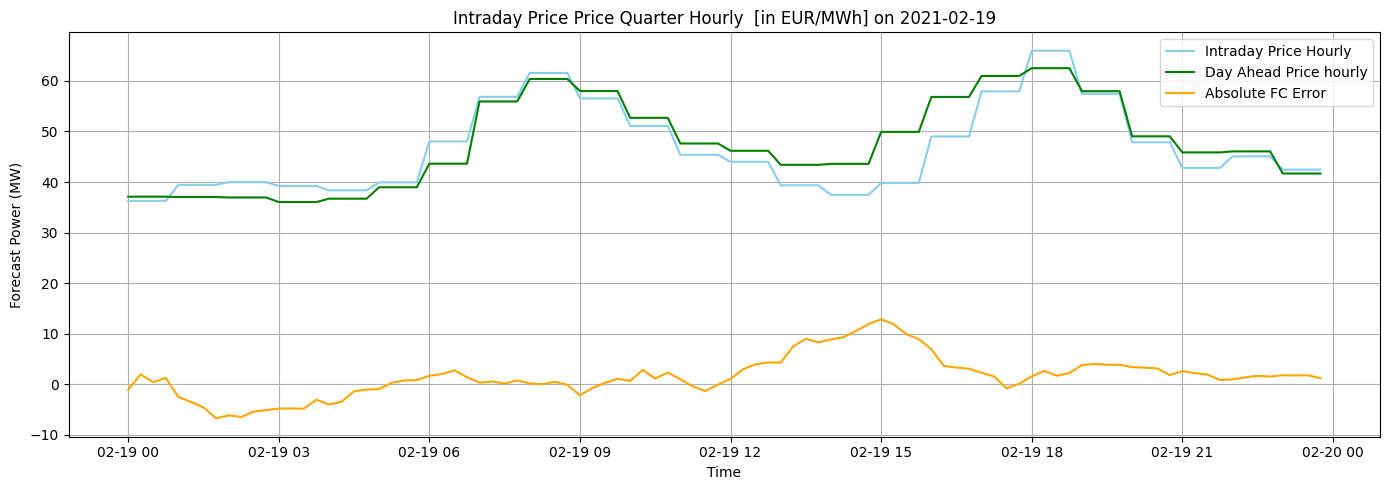

'\nObservations: When there is a strong deveance in absolute forcasting error of renewables, there is also an strong increase or decrease \nin prices.\nThus we can build a strategy, that tries to capitalize on the behaviour and generate a trading signal\n'

In [37]:
# Exploring Price Behaviour, when is it cheap to charge up the battery and when is it expensive
day = 19
month = 2
year = 2021

# filter the day
date_mask = (df_year.index.date == pd.Timestamp(year, month, day).date())
df_day = df_year[date_mask]


df_day['PV FC Error'] = -(df_day['PV Day Ahead Forecast [in MW]'] - df_day['PV Intraday Forecast [in MW]'])
df_day['Wind FC Error'] = -(df_day['Wind Day Ahead Forecast [in MW]'] - df_day['Wind Intraday Forecast [in MW]'])

df_day['Total FC Error'] = df_day['PV FC Error'] + df_day['Wind FC Error']

plt.figure(figsize=(14, 5))

plt.plot(df_day.index, df_day['Intraday Price Hourly  [in EUR/MWh]'], label = 'Intraday Price Hourly', color='skyblue')
plt.plot(df_day.index, df_day['Day Ahead Price hourly [in EUR/MWh]'], label = 'Day Ahead Price hourly', color='green')
plt.plot(df_day.index, (df_day['Total FC Error']/200), # Scaling for better demonstration purposes
         label = 'Absolute FC Error', color='orange')

plt.title(f"Intraday Price Price Quarter Hourly  [in EUR/MWh] on {year}-{month:02d}-{day:02d}")
plt.xlabel("Time")
plt.ylabel("Forecast Power (MW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###
'''
Observations: When there is a strong deveance in absolute forcasting error of renewables, there is also an strong increase or decrease 
in prices.
Thus we can build a strategy, that tries to capitalize on the behaviour and generate a trading signal.
'''

### Idea of strategy:
#### Trade during winter months e.g. October to Jan to capitalize on strong deviances of predicting of renewables. Utilize an moving average of Forecast Errors, which acts as the benchmark, based on upside or downside deviations we go long or short. If there is a lot of upside deviation go long since there is an undererstimated supply of renewables which could lead to price spikes and the other way around for overestimation. We trade based on hourly prices and signals to generate stronger signals. A 15min time frame might lead to too much noise and distort the signal.

/var/folders/5z/3qs0ghfx2r9bjc7lqyt7n3dw0000gn/T/ipykernel_29583/2035919631.py:58: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2045.78654182871' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_hourly.at[next_idx, 'Hourly_PnL (€)'] = pnl


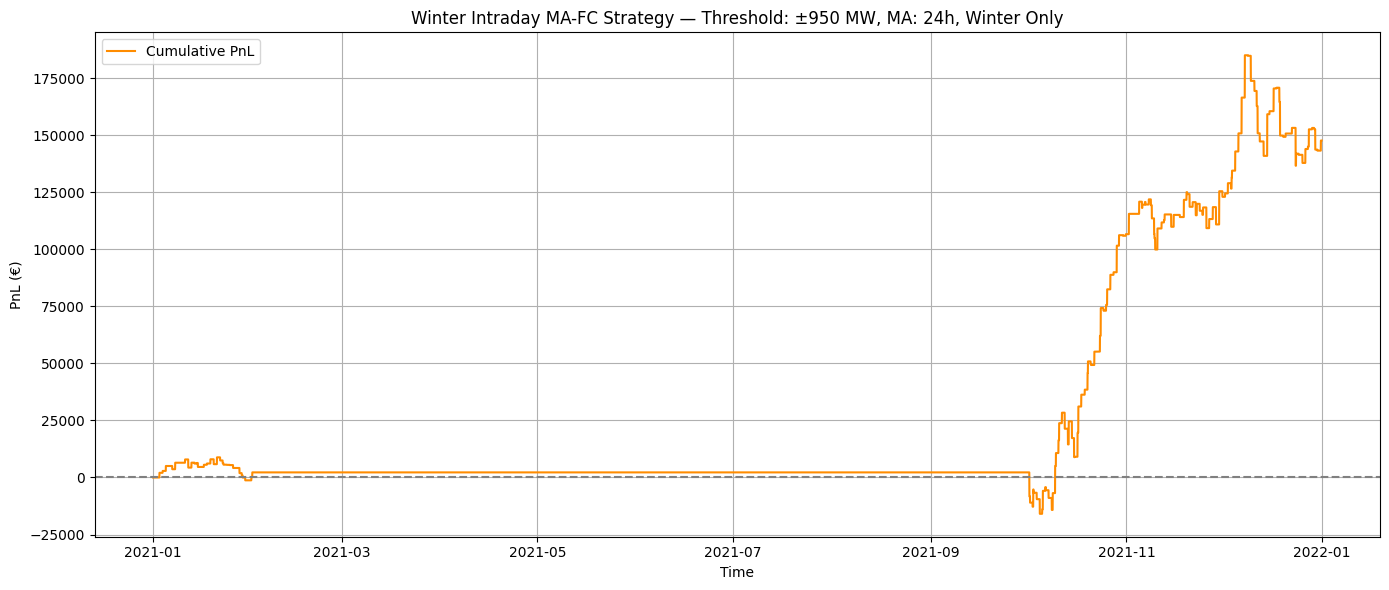

Trade Statistics
Number of Trades: 149
Win Rate: 54.36%
Avg Gain: €4,966.13
Avg Loss: €-3,743.00
Payoff Ratio (|Avg Gain / Avg Loss|): 1.33
95% Value at Risk (1h): €-8,053.14
99% Value at Risk (1h): €-13,401.29
Skewness: 0.15
Kurtosis: 0.83


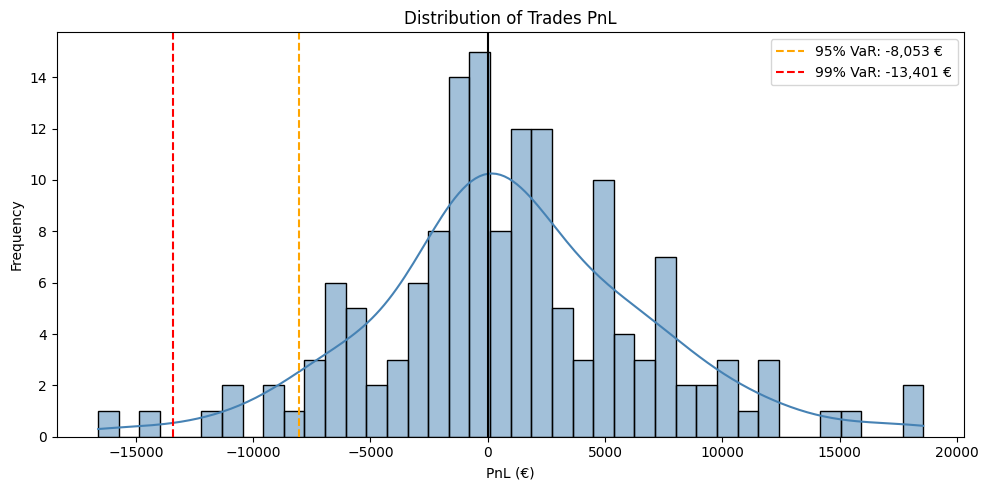

'\nThis strategy seems to function very well in the months Oct, Nov, Dec and Jan.\nMight not extrapolate well for other years. We have more winning than losing\ntrades which is good and we earn more in the winning trades on avg than we lose,\nwhich is a pleasing result.\nAdditionally, testing the strategy in summer months would be\ninteresting. After testing this strategy in the summer it turned out to not produce\nsteady returns, confirming my initial intuition.\n'

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

df = pd.read_excel('analysis_task_data.xlsx', sheet_name='DE_Wind_PV_Prices')
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time').sort_index()
df_hourly = df.resample('h').mean()

# FCalculate the forecast error: intraday vs dayahead
df_hourly['Wind_Error'] = df_hourly['Wind Intraday Forecast [in MW]'] - df_hourly['Wind Day Ahead Forecast [in MW]']
df_hourly['PV_Error'] = df_hourly['PV Intraday Forecast [in MW]'] - df_hourly['PV Day Ahead Forecast [in MW]']
df_hourly['Forecast_Error'] = df_hourly['Wind_Error'].fillna(0) + df_hourly['PV_Error'].fillna(0)

# Rolling average
rolling_window = 24
threshold = 950
df_hourly['Error_MA'] = df_hourly['Forecast_Error'].rolling(rolling_window).mean()

# Filter the months and trading hours
df_hourly['Hour'] = df_hourly.index.hour
df_hourly['Month'] = df_hourly.index.month
# afternoon to evening seems to work best
# one could utilize historic data to get more insight
# sadly not possible with this dataset
trade_hours = list(range(14, 23))  
winter_months = [10, 11, 12, 1]

# tracking columns
df_hourly['Position (MW)'] = 0
df_hourly['Entry_Price'] = np.nan
df_hourly['Exit_Price'] = np.nan
df_hourly['Hourly_PnL (€)'] = 0
df_hourly['Cumulative_PnL (€)'] = 0

# position states
in_position = False
entry_price = None
entry_direction = None
position = 0

# iterate through all the 'valid' hours
for i in range(len(df_hourly) - 1):
    current = df_hourly.iloc[i]
    next_price = df_hourly.iloc[i + 1]['Intraday Price Hourly  [in EUR/MWh]']
    idx = df_hourly.index[i]
    next_idx = df_hourly.index[i + 1]
    #filter out states that do not fulfill the criteria
    is_winter = current['Month'] in winter_months
    is_trading_hour = current['Hour'] in trade_hours
    if not is_winter or not is_trading_hour:
        if in_position:
            # Exit position outside trading window
            pnl = (next_price - entry_price) * position
            df_hourly.at[next_idx, 'Hourly_PnL (€)'] = pnl
            df_hourly.at[next_idx, 'Exit_Price'] = next_price
            in_position = False
            position = 0
            entry_price = None
            entry_direction = None
        continue

    # Signal explained in strategy
    signal = 0
    if current['Forecast_Error'] > current['Error_MA'] + threshold:
        signal = -1  # short
    elif current['Forecast_Error'] < current['Error_MA'] - threshold:
        signal = 1   #long

    ##Two cases:
    # either I am not in a position
    if not in_position and signal != 0:
        entry_price = current['Intraday Price Hourly  [in EUR/MWh]']
        position = signal * 100
        entry_direction = signal
        in_position = True
        df_hourly.at[idx, 'Entry_Price'] = entry_price
        df_hourly.at[idx, 'Position (MW)'] = position

    # or I am already in a position
    elif in_position:
        if signal != entry_direction:
            # Exit position
            pnl = (next_price - entry_price) * position
            df_hourly.at[next_idx, 'Hourly_PnL (€)'] = pnl
            df_hourly.at[next_idx, 'Exit_Price'] = next_price
            in_position = False
            position = 0
            entry_price = None
            entry_direction = None
        else:
            # Hold
            df_hourly.at[idx, 'Position (MW)'] = position
            df_hourly.at[idx, 'Entry_Price'] = entry_price

# Pnl
df_hourly['Cumulative_PnL (€)'] = df_hourly['Hourly_PnL (€)'].cumsum()

plt.figure(figsize=(14,6))
plt.plot(df_hourly.index, df_hourly['Cumulative_PnL (€)'], label='Cumulative PnL', color='darkorange')
plt.axhline(0, linestyle='--', color='grey')
plt.title(f'Winter Intraday MA-FC Strategy — Threshold: ±{threshold} MW, MA: {rolling_window}h, Winter Only')
plt.ylabel('PnL (€)')
plt.xlabel('Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



# Extract hourly trade-level PnLs
trade_pnls = df_hourly['Hourly_PnL (€)'][df_hourly['Hourly_PnL (€)'] != 0]

# Split into winning and losing trades
winning_pnls = trade_pnls[trade_pnls > 0]
losing_pnls = trade_pnls[trade_pnls < 0]

# Win/Loss Rate
win_rate = len(winning_pnls) / len(trade_pnls)
loss_rate = 1 - win_rate

# Avg gain/loss
avg_gain = winning_pnls.mean() if len(winning_pnls) > 0 else 0
avg_loss = losing_pnls.mean() if len(losing_pnls) > 0 else 0
payoff_ratio = abs(avg_gain / avg_loss) if avg_loss != 0 else np.nan

# Value at Risk (VaR)
var_95 = np.percentile(trade_pnls, 5)
var_99 = np.percentile(trade_pnls, 1)

# Skew and Kurtosis
skew_trades = skew(trade_pnls)
kurtosis_trades = kurtosis(trade_pnls)


# Trade Statistics
print(f'Trade Statistics')
print(f'Number of Trades: {len(trade_pnls)}')
print(f'Win Rate: {win_rate:.2%}')
print(f'Avg Gain: €{avg_gain:,.2f}')
print(f'Avg Loss: €{avg_loss:,.2f}')
print(f'Payoff Ratio (|Avg Gain / Avg Loss|): {payoff_ratio:.2f}')
print(f'95% Value at Risk (1h): €{var_95:,.2f}')
print(f'99% Value at Risk (1h): €{var_99:,.2f}')
print(f'Skewness: {skew_trades:.2f}')
print(f'Kurtosis: {kurtosis_trades:.2f}')
# Plot distribution of PnLs and VAR
plt.figure(figsize=(10, 5))
sns.histplot(trade_pnls, bins=40, kde=True, color='steelblue')
plt.axvline(var_95, color='orange', linestyle='--', label=f'95% VaR: {var_95:,.0f} €')
plt.axvline(var_99, color='red', linestyle='--', label=f'99% VaR: {var_99:,.0f} €')
plt.axvline(0, color='black', linestyle='-')
plt.title('Distribution of Trades PnL')
plt.xlabel('PnL (€)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

'''
This strategy seems to function very well in the months Oct, Nov, Dec and Jan.
Might not extrapolate well for other years. We have more winning than losing
trades which is good and we earn more in the winning trades on avg than we lose,
which is a pleasing result. This gets also respected by the slighly pos. skew.
Additionally, testing the strategy in summer months would be
interesting. After testing this strategy in the summer it turned out to not produce
steady returns, confirming my initial intuition.
'''